<a href="https://colab.research.google.com/github/Suyash-28-commits/Customer-Churn-Prediction-/blob/main/ANN_Practical_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dividing dataset into independent and dependent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
#Feature engineering
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [ ]:
geo.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [ ]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [ ]:
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X = pd.concat([X,geo,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU , PReLU , ELU, LeakyReLU

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
#Initializing ANN
clf = Sequential()

In [ ]:
#Adding first layer - input layer - 11 neurons /perceptrons
clf.add(Dense(units=11,activation='relu'))

In [ ]:
clf.add(Dropout(0.3))

In [ ]:
#Hidden Layer - 1 : 7 Neurons
clf.add(Dense(units=7,activation='relu'))

In [ ]:
clf.add(Dropout(0.5))

In [ ]:
#Hidden Layer - 2 : 6 Neurons
clf.add(Dense(units=6,activation='relu'))

In [ ]:
#Output Layer - 1 Neuron for Binary Classification of 0 or 1
clf.add(Dense(units=1,activation='sigmoid'))

In [ ]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = clf.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8740 - loss: 0.3106 - val_accuracy: 0.8466 - val_loss: 0.3672
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8663 - loss: 0.3300 - val_accuracy: 0.8519 - val_loss: 0.3671
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8788 - loss: 0.3077 - val_accuracy: 0.8493 - val_loss: 0.3740
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8762 - loss: 0.3150 - val_accuracy: 0.8512 - val_loss: 0.3726
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8742 - loss: 0.3132 - val_accuracy: 0.8523 - val_loss: 0.3705
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8768 - loss: 0.3089 - val_accuracy: 0.8493 - val_loss: 0.3711
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8776 - loss: 0.3074 - val_accuracy: 0.8459 - val_loss: 0.3677
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8743 - loss: 0.3093 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

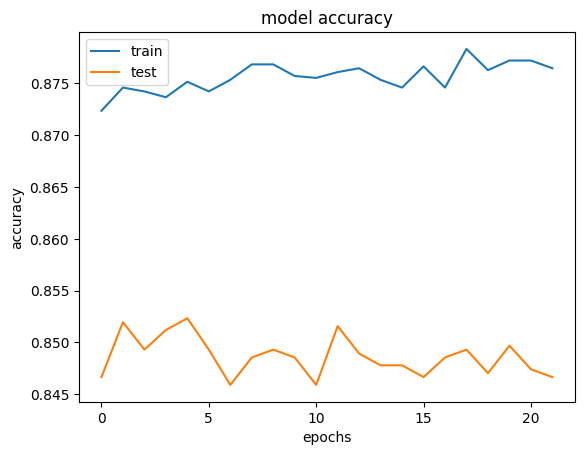

In [ ]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

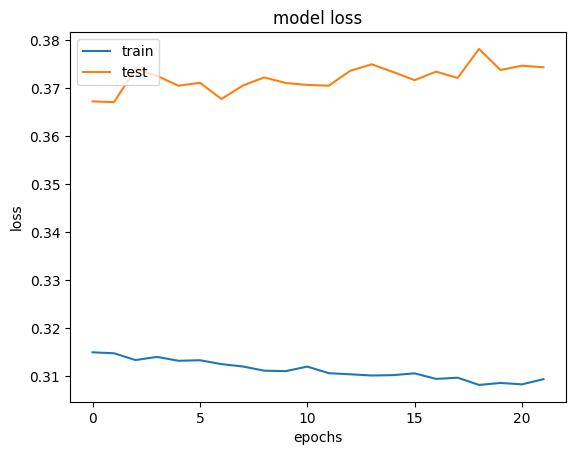

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

In [ ]:
y_pred = clf.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1499,   96],
       [ 219,  186]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)

In [ ]:
accuracy

0.8425

In [ ]:
clf.get_weights()

[array([[-0.03300766, -0.1340005 , -0.01461131,  0.13129929,  0.70705074,
         -0.02456715, -0.11885241,  0.09336274, -0.2389111 ,  0.11194562,
          0.45038128],
        [-0.26730403, -0.40840134,  0.42940447, -0.04062556, -0.02565863,
          0.19939041, -0.6646569 , -0.18846317,  0.907133  ,  1.0135804 ,
         -0.6582824 ],
        [-0.12710704, -0.37482533, -0.07623268, -0.07486238,  0.6794845 ,
         -0.12694243, -0.01282605, -0.24449202, -0.21742705,  0.10576427,
          0.29507682],
        [-0.26748836,  0.03706406, -0.50828433, -0.58429044, -0.25787893,
          0.18443319,  0.42626262,  0.7045946 ,  0.26581275, -0.6313391 ,
          0.02619137],
        [ 0.04152941,  0.5583626 , -0.91975206,  0.3500819 , -0.23802404,
          1.1425835 , -0.05003462,  0.00923264,  0.03101777,  0.35247928,
         -0.3709639 ],
        [-0.40264142,  0.35418463, -0.08503653, -0.14551383,  0.30459937,
         -0.03698157, -0.4286844 , -0.6841801 , -0.2900852 , -0.1024801

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json


file_path = "/content/drive/MyDrive/Colab Notebooks/ANN_Practical_Implementation.ipynb"


with open(file_path, "r", encoding="utf-8") as f:
    notebook_data = json.load(f)


if "widgets" in notebook_data.get("metadata", {}):
    print("Fixing metadata.widgets...")
    del notebook_data["metadata"]["widgets"]


with open(file_path, "w", encoding="utf-8") as f:
    json.dump(notebook_data, f, indent=1)

print("Notebook fixed and saved successfully.")

Notebook fixed and saved successfully.
